<a href="https://colab.research.google.com/github/KhamdGek/FireCNN-Embeddedlab/blob/master/FIRE%20DETECTION%20USING%20CNN%20%5BTENSORFLOW%202.2.0%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fire Detecting CNN using Tensorflow and Keras



>The following project was made using Tensorflow/Keras. The below CNN was trained to detect Fire from dataset obtained from Pyimagesearc prepared by Adrian Rosebrock. Different techniques were used in the following code e.g greate dataset, Larger Epochs, Train/test- 80/20 split, dropout. An accuracy of 88% achieved with maximum effort to avoid overfitting of the model.


**Import the necessary packages**

In [89]:
import tensorflow as tf
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
#import packages for making model using keras layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

print(tf.__version__)

2.2.0


**Mount google drive for data import and model saving**

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING DATASETS**

The following function load the dataset in array form. All the images are resized to 128*128.This function is provided with imagePath where all the images are contained.

In [0]:
def load_dataset(datasetPath):
	# grab the paths to all images in our dataset directory, then
	# initialize our lists of images
	imagePaths = list(paths.list_images(datasetPath))
	data = []

	# loop over the image paths
	for imagePath in imagePaths:
		# load the image and resize it to be a fixed 128x128 pixels,
		# ignoring aspect ratio
		image = cv2.imread(imagePath)
		image = cv2.resize(image, (128, 128))
    
		# add the image to the data lists
		data.append(image)
    

	# return the data list as a NumPy array
	return np.array(data, dtype="float32")

**Data processing**

Image path is set where fire/nonfire data is present.Classes is set that is 0 => Non fire and 1 => fire. Epochs is set upto 50 and optimum learning rate of 0.01 is selected. The train/test split is 80/20.

In [0]:
# initialize the path to the fire and non-fire dataset directories
FIRE_PATH = '/content/drive/My Drive/Colab Notebooks/Fire sample/Fire'
NON_FIRE_PATH = '/content/drive/My Drive/Colab Notebooks/NONFIRE/spatial_envelope_256x256_static_8outdoorcategories'

# initialize the class labels in the dataset
CLASSES = ["Non-Fire", "Fire"]

# define the size of the training and testing split
TRAIN_SPLIT = 0.80
TEST_SPLIT = 0.20

# define the initial learning rate, batch size, and number of epochs
INIT_LR = 1e-2
BATCH_SIZE = 50
NUM_EPOCHS = 15
SAMPLE_SIZE = 50


In [0]:
print("STARTING")
fireData = load_dataset(FIRE_PATH)
print("FireDATA completed....")

In [29]:
print(fireData.shape)

(1405, 128, 128, 3)


In [7]:
print("STARTING NONFIRE DATA")
nonFireData = load_dataset(NON_FIRE_PATH)
print("WARNING! fireData and nonFireData have been uploaded")

print(nonFireData.shape)
print(FireData.shape)

STARTING NONFIRE DATA
WARNING! fireData and nonFireData have been uploaded
(2693, 128, 128, 3)


**MODEL**

CNN is made with Relu and softmax as activation function. Dropout layers are also added to improve the accuracy of the model.

In [0]:

class FireDetectionNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(height,width,depth)),
    tf.keras.layers.MaxPool2D(2,2),
		tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
		tf.keras.layers.MaxPool2D(2,2),
		tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
		tf.keras.layers.MaxPool2D(2,2),
		tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
		tf.keras.layers.MaxPool2D(2,2),
	#	tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
		tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
		tf.keras.layers.MaxPool2D(2,2),
	#	tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
	#	tf.keras.layers.MaxPool2D(2,2),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(512,activation='relu'),
		tf.keras.layers.Dropout(0.3),
		tf.keras.layers.Dense(512,activation='relu'),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(512,activation='relu'),
		tf.keras.layers.Dense(2,activation='softmax')
		])
		# return the constructed network architecture
		return model

**Image labeling and stacking**

Each image is carefully labeled 0/1 and stacked [0,1] where 0=>Non-fire and 1=>Fire. The images are NORMALIZED by dividng by 255.0. The data is split using train_test_split() package

In [110]:
print("[LABELING DATA]...")
fireLabels = np.ones((fireData.shape[0],))
nonFireLabels = np.zeros((nonFireData.shape[0],))
print("[DATA LABELING COMPLETED]...")

print("[STACKING FIRE AND NON-FIRE DATA]...")
data = np.vstack([fireData, nonFireData])
labels = np.hstack([fireLabels, nonFireLabels])
print("[STACKING FIRE AND NON-FIRE DATA COMPLETED!]...")

print("[Normalizing images]...")
data /= 255

# perform one-hot encoding on the labels and account for skew in the labeled data
labels = to_categorical(labels, num_classes=2)
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

print("[Spliting Data into train/test]...")
# construct the training and testing split
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size= TEST_SPLIT, random_state=42)
print("[Spliting Data into train/test Successful!]...")
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

[LABELING DATA]...
[DATA LABELING COMPLETED]...
[STACKING FIRE AND NON-FIRE DATA]...
[STACKING FIRE AND NON-FIRE DATA COMPLETED!]...
[Normalizing images]...
[Spliting Data into train/test]...
[Spliting Data into train/test Successful!]...
(3278, 128, 128, 3)
(3278, 2)
(820, 128, 128, 3)
(820, 2)


**MODEL SUMMARY**


In [111]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 12, 12, 128)     

**MODEL COMPLIE**

Optimizer is selected **SGD**. The model is complied **binary cross entropy **is used in calculating loss of model.

In [109]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr= INIT_LR, momentum=0.9,
	decay= INIT_LR /  NUM_EPOCHS)
	
model = FireDetectionNet.build(width=128, height=128, depth=3,
	classes=2)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


[INFO] compiling model...


**TRAINING MODEL**

Data augmentation is done on the images for improving the accuracy of model. Model is trained.

In [112]:
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# train the network/ prepare iterator
print("[training network...]")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size= BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] //  BATCH_SIZE,
	epochs= NUM_EPOCHS)
print("[training network COMPLETED...]")

[training network...]
Epoch 1/15
65/65 [==============================] - 155s 2s/step - loss: 0.6358 - accuracy: 0.6648 - val_loss: 0.6230 - val_accuracy: 0.6220
Epoch 2/15
65/65 [==============================] - 156s 2s/step - loss: 0.5809 - accuracy: 0.7042 - val_loss: 0.5267 - val_accuracy: 0.7634
Epoch 3/15
65/65 [==============================] - 155s 2s/step - loss: 0.4944 - accuracy: 0.7627 - val_loss: 0.4243 - val_accuracy: 0.8207
Epoch 4/15
65/65 [==============================] - 155s 2s/step - loss: 0.4455 - accuracy: 0.7875 - val_loss: 0.5488 - val_accuracy: 0.7317
Epoch 5/15
65/65 [==============================] - 154s 2s/step - loss: 0.4429 - accuracy: 0.7828 - val_loss: 0.3829 - val_accuracy: 0.8220
Epoch 6/15
65/65 [==============================] - 153s 2s/step - loss: 0.4296 - accuracy: 0.8017 - val_loss: 0.4082 - val_accuracy: 0.8049
Epoch 7/15
65/65 [==============================] - 154s 2s/step - loss: 0.3962 - accuracy: 0.8172 - val_loss: 0.4545 - val_accuracy

**EVALUATING THE MODEL**

Model is predictied using package and classification report is produced at the end.

In [113]:
print("[Evaluating network...] ")
predictions = model.predict(testX, batch_size= BATCH_SIZE)
print("[Classicfication Report...] ")
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names= CLASSES))


[Evaluating network...] 
[Classicfication Report...] 
              precision    recall  f1-score   support

    Non-Fire       0.97      0.52      0.68       510
        Fire       0.55      0.97      0.70       310

    accuracy                           0.69       820
   macro avg       0.76      0.75      0.69       820
weighted avg       0.81      0.69      0.69       820



**Graphical report representation**

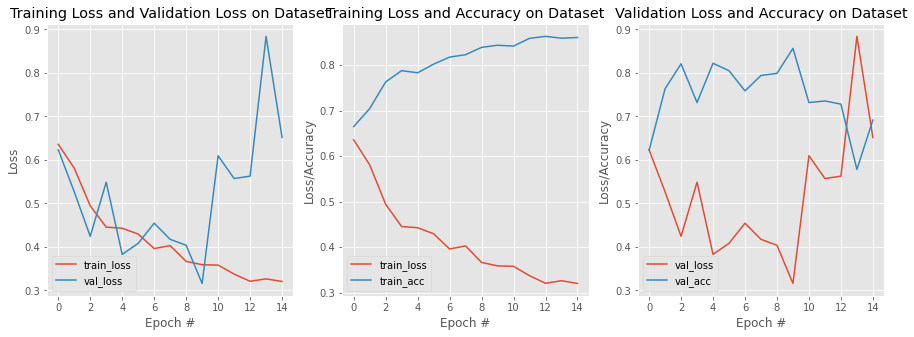

In [124]:
%matplotlib inline
plt.figure()
import matplotlib.pyplot as plt

matplotlib.use("Agg")
plt.style.use("ggplot")
fig = plt.figure()
fig.set_size_inches(15, 5)
    
fig.add_subplot(1, 3, 1)
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
   
fig.add_subplot(1, 3, 2)
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
    
fig.add_subplot(1, 3, 3)
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Validation Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


**TESTING PREDICTION**

[INFO] predicting...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


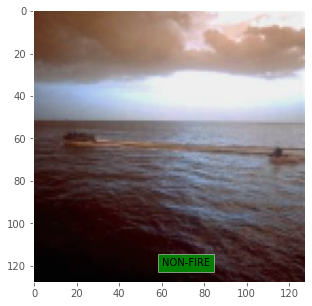

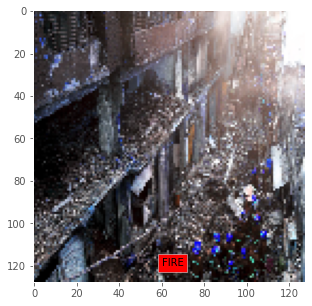

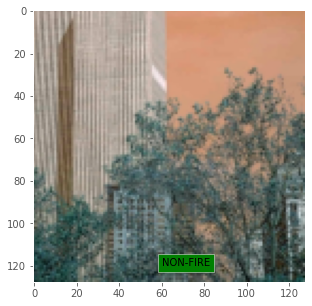

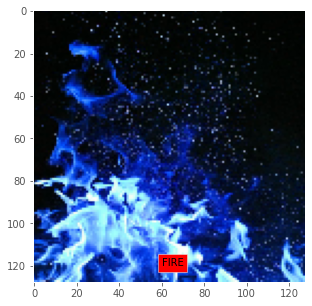

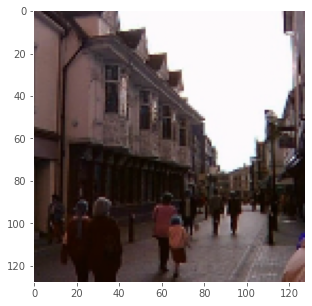

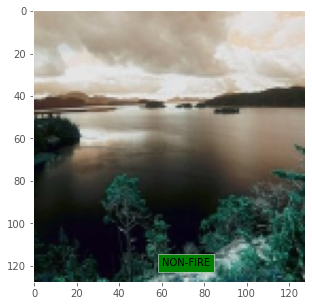

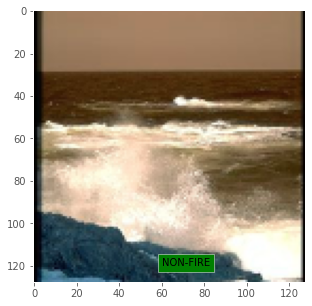

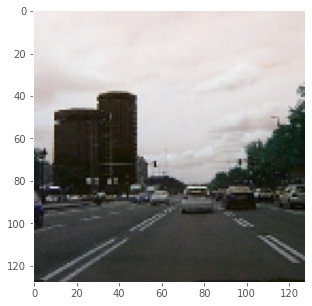

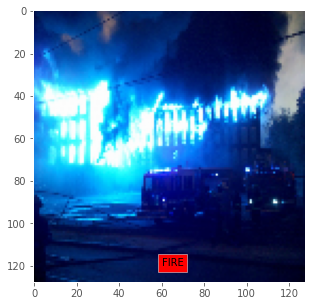

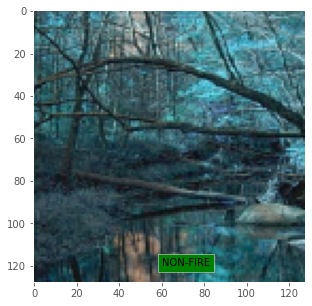

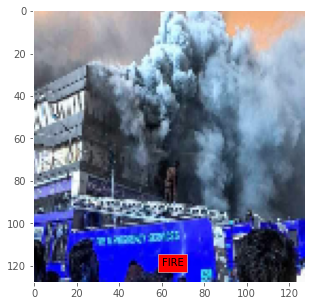

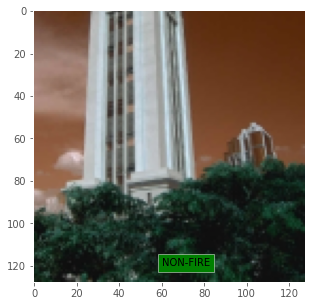

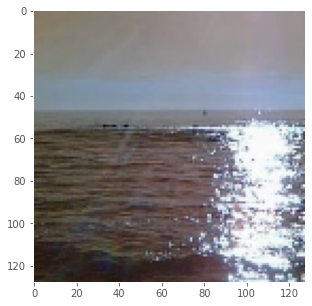

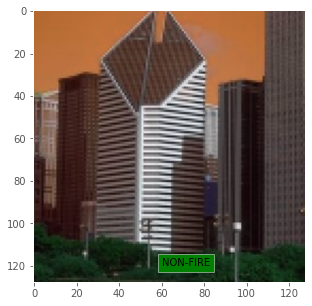

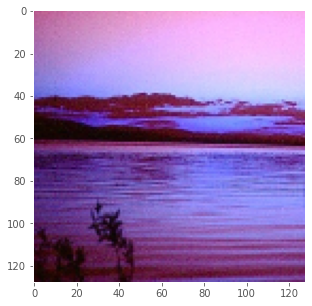

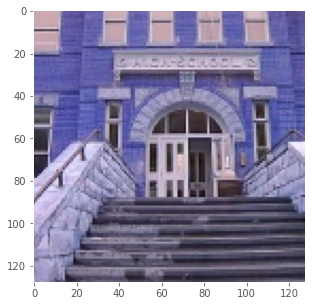

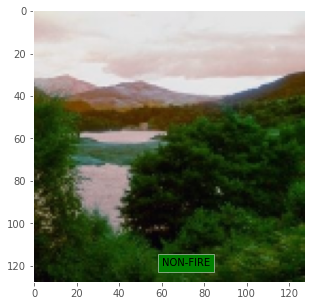

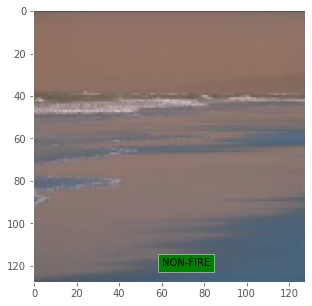

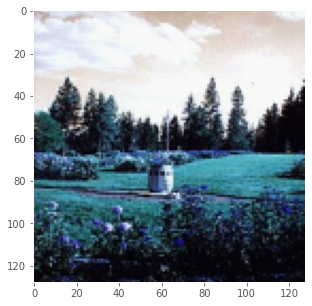

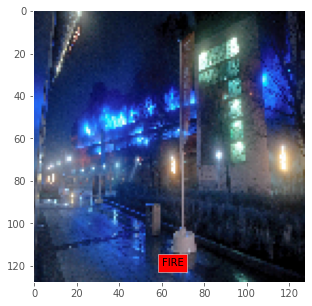

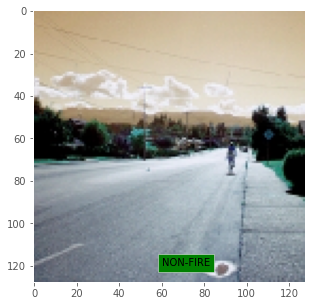

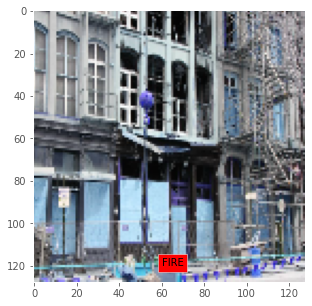

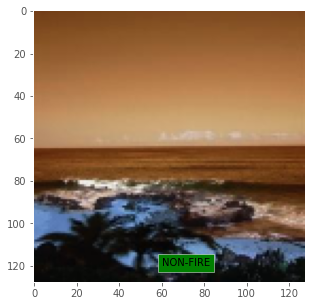

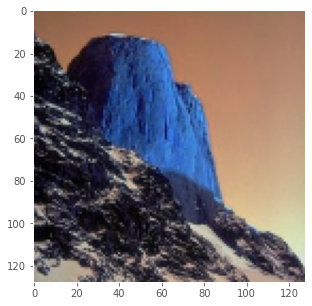

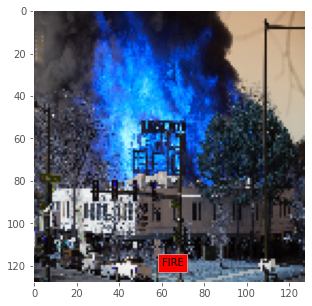

In [186]:
from tensorflow.keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import cv2

# grab the paths to the fire and non-fire images, respectively
print("[INFO] predicting...")
%matplotlib inline
for i in range(25):
  plt.figure(figsize=(5,5))
  plt.grid(False)
  plt.imshow(testX[i], cmap=plt.cm.binary)
  if testY[i][0] == 1:
    if predictions[i][0] > 0.5:
       plt.text(60,120 , 'NON-FIRE',fontsize=10, bbox=dict(facecolor='green', alpha=1))
       
    else:
      pass
  else:
    if predictions[i][1] > 0.5:
       plt.text(60,120 , 'FIRE',fontsize=10, bbox=dict(facecolor='Red', alpha=1))
     
    else:
      pass


plt.show()

**References for Fire and NON-Fire detection was taken from the following links:**

https://medium.com/@mrgarg.rajat/kaggle-dogs-vs-cats-challenge-complete-step-by-step-guide-part-2-e9ee4967b9
https://www.codeproject.com/Articles/4023566/Cat-or-Not-An-Image-Classifier-using-Python-and-Ke
https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8
 https://www.pyimagesearch.com/2019/11/18/fire-and-smoke-detection-with-keras-and-deep-learning/

In [187]:
# Save the entire model as a SavedModel.
!mkdir -p saved_modelFIRECNN
MODEL_PATH = '/content/drive/My Drive/Colab Notebooks'
model.save( MODEL_PATH)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/assets
